# Experimentation
Having written the functions required to implement estimation of $\mathcal{P}$, we now experiment with a few different model parameters.

In [40]:
include("experimentation.jl");

## The setup
As before, we set up the state space as the flat torus $\mathbb{T}^2$, represented by the square $[0, 2\pi] \times [0, 2\pi]$.

In [2]:
range = 2π;

In [3]:
grid_size = 100;
n_gridpoints = grid_size ^ 2;
grid = creategrid(0, range, grid_size);

In [4]:
k = 0.0;
integral_resolution = 500;

## Experimentation

In [5]:
sample_sizes = [144, 196, 256, 324, 400, 484, 576];
n_experiments = length(sample_sizes);

In [6]:
n_runs = 10;

### Standard map (grid)

In [41]:
results_grid_stand = Vector{Dict}()
for s in 1:n_experiments
    println("Estimating $s / $n_experiments ...")
    sample_size = sample_sizes[s]

    output = estimate_P(grid, sample_size, range, k, integral_resolution; setup="grid", map_type="standard");
    metrics = P_diagnostics(output);
    push!(results_grid_stand, metrics)
end;

Estimating 1 / 7 ...
Estimating 2 / 7 ...
Estimating 3 / 7 ...
Estimating 4 / 7 ...
Estimating 5 / 7 ...
Estimating 6 / 7 ...
Estimating 7 / 7 ...


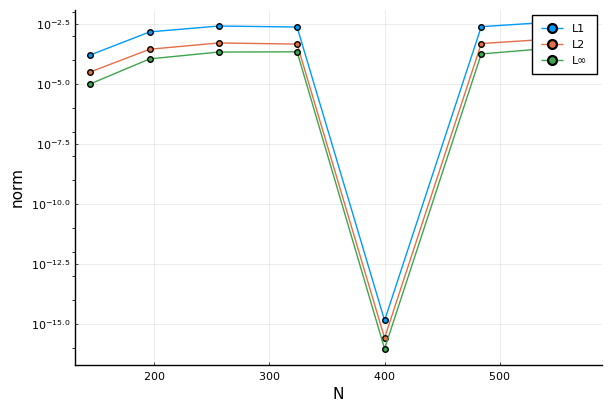

In [42]:
plot_metrics(results_grid_stand, sample_sizes, "estimation")
savefig("figures/convergence_grid_standard_estimation.pdf")

### Standard map (scattered)

In [11]:
results_scatt_stand = Vector{Vector}(undef, n_experiments)
for s in 1:n_experiments
    println("Estimating $s / $n_experiments ...")
    sample_size = sample_sizes[s]
    
    run_results = Vector{Dict}()
    for run in 1:n_runs
        output = estimate_P(grid, sample_size, range, k, integral_resolution; setup="scattered", map_type="standard");
        metrics = P_diagnostics(output);
        push!(run_results, metrics)
    end
    
    results_scatt_stand[s] = run_results
end;

Estimating 1 / 7 ...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2644 columns and 362500 nonzeros
Model fingerprint: 0x96e65910
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [6e-12, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.10s
Presolved: 2500 rows, 2644 columns, 362500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.01s

Barrier statistics:
 Dense cols : 144
 AA' NZ     : 3.600e+05
 Factor NZ  : 4.016e+05 (roughly 5 MBytes of memory)
 Factor Ops : 6.234e+07 (less than 1 second per iteration)
 Threads    : 2

                  Ob

Objective value is: 0.1431814650823071

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2644 columns and 362500 nonzeros
Model fingerprint: 0x2125ab50
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-11, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 3e+00]
Presolve time: 0.10s
Presolved: 2500 rows, 2644 columns, 362500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.01s

Barrier statistics:
 Dense cols : 144
 AA' NZ     : 3.600e+05
 Factor NZ  : 4.016e+05 (roughly 5 MBytes of memory)
 Factor Ops : 6.234e+07 (less than 1 second per iteration)
 Threads    : 2

  

Objective value is: 13.822511559246777

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2644 columns and 362500 nonzeros
Model fingerprint: 0xb5d5c5b5
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.11s
Presolved: 2500 rows, 2644 columns, 362500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.01s

Barrier statistics:
 Dense cols : 144
 AA' NZ     : 3.600e+05
 Factor NZ  : 4.016e+05 (roughly 5 MBytes of memory)
 Factor Ops : 6.234e+07 (less than 1 second per iteration)
 Threads    : 2

  

Objective value is: 0.6046437100412732

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2696 columns and 484157 nonzeros
Model fingerprint: 0x777ac8a9
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.19s
Presolved: 2500 rows, 2696 columns, 484157 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.02s

Barrier statistics:
 Dense cols : 196
 AA' NZ     : 4.817e+05
 Factor NZ  : 5.086e+05 (roughly 7 MBytes of memory)


Objective value is: 0.013302615228894865

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2696 columns and 492500 nonzeros
Model fingerprint: 0x8ebeceee
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-09, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 3e+00]
Presolve time: 0.13s
Presolved: 2500 rows, 2696 columns, 492500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.02s

Barrier statistics:
 Dense cols : 196
 AA' NZ     : 4.900e+05
 Factor NZ  : 5.405e+05 (roughly 6 MBytes of memory)
 Factor Ops : 1.113e+08 (less than 1 second per iteration)
 Threads    : 2



Objective value is: 0.7005316516069797
Estimating 3 / 7 ...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2756 columns and 637103 nonzeros
Model fingerprint: 0xa0d0e628
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.27s
Presolved: 2500 rows, 2756 columns, 637103 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.03s

Barrier statistics:
 Dense cols : 256
 AA' NZ     : 6.346e+05
 Factor NZ  : 6.765e+05 (roughly

Objective value is: 0.008779514293564716

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2756 columns and 603819 nonzeros
Model fingerprint: 0xc3bcb8e1
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.17s
Presolved: 2500 rows, 2756 columns, 603819 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.02s

Barrier statistics:
 Dense cols : 256
 AA' NZ     : 6.013e+05
 Factor NZ  : 6.369e+05 (roughly 10 MBytes of memor

Objective value is: 0.13380209917067987

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2756 columns and 636813 nonzeros
Model fingerprint: 0x4b3c184c
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.17s
Presolved: 2500 rows, 2756 columns, 636813 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.03s

Barrier statistics:
 Dense cols : 256
 AA' NZ     : 6.343e+05
 Factor NZ  : 6.765e+05 (roughly 9 MBytes of memory)

Objective value is: 0.03814125751887332

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2824 columns and 776782 nonzeros
Model fingerprint: 0xfa7776a2
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.21s
Presolved: 2500 rows, 2824 columns, 776782 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.03s

Barrier statistics:
 Dense cols : 324
 AA' NZ     : 7.743e+05
 Factor NZ  : 8.296e+05 (roughly 12 MBytes of memory

Objective value is: 0.062443044537758396

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2824 columns and 766751 nonzeros
Model fingerprint: 0xdf04b411
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.21s
Presolved: 2500 rows, 2824 columns, 766751 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.03s

Barrier statistics:
 Dense cols : 324
 AA' NZ     : 7.643e+05
 Factor NZ  : 8.195e+05 (roughly 12 MBytes of memor

Objective value is: 5.0059683417202905e-5
Estimating 5 / 7 ...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2900 columns and 980612 nonzeros
Model fingerprint: 0xec70b291
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.26s
Presolved: 2500 rows, 2900 columns, 980612 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.04s

Barrier statistics:
 Dense cols : 400
 AA' NZ     : 9.781e+05
 Factor NZ  : 1.061e+06 (roug

Objective value is: 0.026170662372351217

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2900 columns and 770990 nonzeros
Model fingerprint: 0x7925c428
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.22s
Presolved: 2500 rows, 2900 columns, 770990 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.04s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+06 (roughly 27 MBytes of memory)
 Factor Ops : 5

Objective value is: 0.17907454676924317

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2900 columns and 720512 nonzeros
Model fingerprint: 0x2ca79c0f
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e-01, 9e-01]
Presolve time: 0.24s
Presolved: 2500 rows, 2900 columns, 720512 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.06s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+06 (roughly 27 MBytes of memory)
 Factor Ops : 5.

Objective value is: 0.12062023909265918

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2984 columns and 1084142 nonzeros
Model fingerprint: 0xd50d82be
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.30s
Presolved: 2500 rows, 2984 columns, 1084142 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.05s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+06 (roughly 27 MBytes of memory)
 Factor Ops : 

Objective value is: 0.00023776584203005768

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2984 columns and 919929 nonzeros
Model fingerprint: 0xd76854e3
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.25s
Presolved: 2500 rows, 2984 columns, 919929 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.05s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+06 (roughly 27 MBytes of memory)
 Factor Ops :

Objective value is: 0.017284063951592543
Estimating 7 / 7 ...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 3076 columns and 928341 nonzeros
Model fingerprint: 0x3c24df02
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-01, 8e-01]
Presolve time: 0.25s
Presolved: 2500 rows, 3076 columns, 928341 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.03s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+06 (roughly 27 MBytes of me

Objective value is: 0.0001421005836164113

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 3076 columns and 1179721 nonzeros
Model fingerprint: 0xcdb8695f
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.32s
Presolved: 2500 rows, 3076 columns, 1179721 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.04s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+06 (roughly 27 MBytes of memory)
 Factor Ops 

Objective value is: 5.7445798120170366e-5

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 3076 columns and 890228 nonzeros
Model fingerprint: 0xef419a1a
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-01, 8e-01]
Presolve time: 0.24s
Presolved: 2500 rows, 3076 columns, 890228 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.03s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+06 (roughly 27 MBytes of memory)
 Factor Ops : 

In [12]:
averaged_results_scatt_stand = average_the_results(results_scatt_stand);

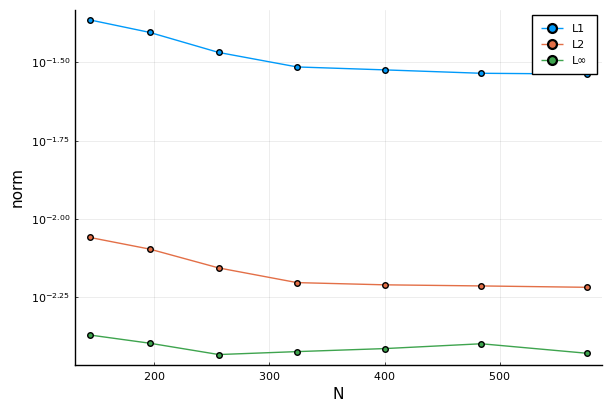

In [14]:
plot_metrics(averaged_results_scatt_stand, sample_sizes, "estimation")
savefig("figures/convergence_scatter_standard_estimation.pdf")

### Cat map (grid)

In [43]:
results_grid_cat = Vector{Dict}()
for s in 1:n_experiments
    println("Estimating $s / $n_experiments ...")
    sample_size = sample_sizes[s]

    output = estimate_P(grid, sample_size, range, k, integral_resolution; setup="grid", map_type="cat");
    metrics = P_diagnostics(output);
    push!(results_grid_cat, metrics)
end;

Estimating 1 / 7 ...
Estimating 2 / 7 ...
Estimating 3 / 7 ...
Estimating 4 / 7 ...
Estimating 5 / 7 ...
Estimating 6 / 7 ...
Estimating 7 / 7 ...


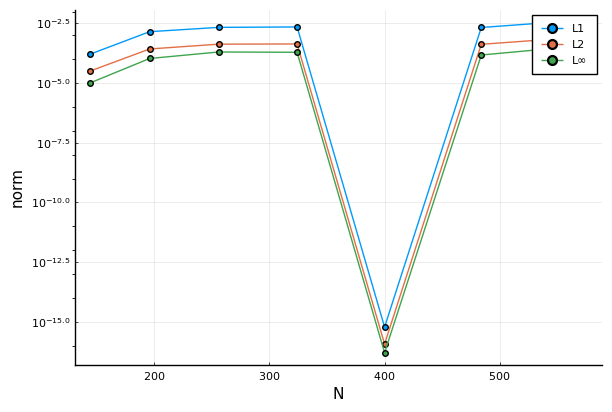

In [44]:
plot_metrics(results_grid_cat, sample_sizes, "estimation")
savefig("figures/convergence_grid_cat_estimation.pdf")

### Cat map (scattered)

In [7]:
results_scatt_cat = Vector{Vector}(undef, n_experiments)
for s in 1:n_experiments
    println("Estimating $s / $n_experiments ...")
    sample_size = sample_sizes[s]
    
    run_results = Vector{Dict}()
    for run in 1:n_runs
        output = estimate_P(grid, sample_size, range, k, integral_resolution; setup="scattered", map_type="cat");
        metrics = P_diagnostics(output);
        push!(run_results, metrics)
    end
    
    results_scatt_cat[s] = run_results
end;

Estimating 1 / 7 ...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2644 columns and 362500 nonzeros
Model fingerprint: 0xb12f7536
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [6e-06, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+00, 5e+00]
Presolve time: 0.10s
Presolved: 2500 rows, 2644 columns, 362500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.01s

Barrier statistics:
 Dense cols : 144
 AA' NZ     : 3.600e+05
 Factor NZ  : 4.016e+05 (roughly 5 MBytes of memory)
 Factor Ops : 6.234e+07 (less than 1 second per iteration)
 Threads    : 2

                  Ob

Objective value is: 0.30478687791037373

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2644 columns and 362500 nonzeros
Model fingerprint: 0x8e2fa77d
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-09, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 3e+00]
Presolve time: 0.09s
Presolved: 2500 rows, 2644 columns, 362500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.01s

Barrier statistics:
 Dense cols : 144
 AA' NZ     : 3.600e+05
 Factor NZ  : 4.016e+05 (roughly 5 MBytes of memory)
 Factor Ops : 6.234e+07 (less than 1 second per iteration)
 Threads    : 2

 

Objective value is: 1.37726275485511

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2644 columns and 362500 nonzeros
Model fingerprint: 0x3bcd886f
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [8e-10, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 3e+00]
Presolve time: 0.09s
Presolved: 2500 rows, 2644 columns, 362500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.01s

Barrier statistics:
 Dense cols : 144
 AA' NZ     : 3.600e+05
 Factor NZ  : 4.016e+05 (roughly 5 MBytes of memory)
 Factor Ops : 6.234e+07 (less than 1 second per iteration)
 Threads    : 2

    

Objective value is: 6.0880394993646405

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2696 columns and 492500 nonzeros
Model fingerprint: 0x018ceb47
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-07, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 4e+00]
Presolve time: 0.12s
Presolved: 2500 rows, 2696 columns, 492500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.02s

Barrier statistics:
 Dense cols : 196
 AA' NZ     : 4.900e+05
 Factor NZ  : 5.405e+05 (roughly 6 MBytes of memory)
 Factor Ops : 1.113e+08 (less than 1 second per iteration)
 Threads    : 2

  

Objective value is: 0.07095677181678184

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2696 columns and 492500 nonzeros
Model fingerprint: 0x6b434dab
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-07, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 4e+00]
Presolve time: 0.12s
Presolved: 2500 rows, 2696 columns, 492500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.02s

Barrier statistics:
 Dense cols : 196
 AA' NZ     : 4.900e+05
 Factor NZ  : 5.405e+05 (roughly 6 MBytes of memory)
 Factor Ops : 1.113e+08 (less than 1 second per iteration)
 Threads    : 2

 

Objective value is: 0.23013268167414935
Estimating 3 / 7 ...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2756 columns and 614688 nonzeros
Model fingerprint: 0xca96da4d
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.17s
Presolved: 2500 rows, 2756 columns, 614688 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.02s

Barrier statistics:
 Dense cols : 256
 AA' NZ     : 6.122e+05
 Factor NZ  : 6.481e+05 (roughl

Objective value is: 0.028148558366410725

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2756 columns and 642500 nonzeros
Model fingerprint: 0x849998c8
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.16s
Presolved: 2500 rows, 2756 columns, 642500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.02s

Barrier statistics:
 Dense cols : 256
 AA' NZ     : 6.400e+05
 Factor NZ  : 7.041e+05 (roughly 8 MBytes of memory)
 Factor Ops : 1.860e+08 (less than 1 second per iteration)
 Threads    : 2



Objective value is: 0.03812523800206691

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2756 columns and 642500 nonzeros
Model fingerprint: 0xa784617c
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-12, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.16s
Presolved: 2500 rows, 2756 columns, 642500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.03s

Barrier statistics:
 Dense cols : 256
 AA' NZ     : 6.400e+05
 Factor NZ  : 7.041e+05 (roughly 8 MBytes of memory)
 Factor Ops : 1.860e+08 (less than 1 second per iteration)
 Threads    : 2

 

Objective value is: 0.10098460870995041

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2824 columns and 757376 nonzeros
Model fingerprint: 0x81d35890
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.20s
Presolved: 2500 rows, 2824 columns, 757376 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.02s

Barrier statistics:
 Dense cols : 324
 AA' NZ     : 7.549e+05
 Factor NZ  : 8.101e+05 (roughly 12 MBytes of memory

Objective value is: 0.7293735391076552

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2824 columns and 669046 nonzeros
Model fingerprint: 0x41d15e60
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.18s
Presolved: 2500 rows, 2824 columns, 669046 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.03s

Barrier statistics:
 Dense cols : 324
 AA' NZ     : 6.665e+05
 Factor NZ  : 7.217e+05 (roughly 10 MBytes of memory)

Objective value is: 0.20113524836961005
Estimating 5 / 7 ...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2900 columns and 861392 nonzeros
Model fingerprint: 0x1e7d3d7c
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.23s
Presolved: 2500 rows, 2900 columns, 861392 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.04s

Barrier statistics:
 Dense cols : 400
 AA' NZ     : 8.589e+05
 Factor NZ  : 9.416e+05 (roughl

Objective value is: 0.013979726008983562

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2900 columns and 946953 nonzeros
Model fingerprint: 0x1bec387a
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.26s
Presolved: 2500 rows, 2900 columns, 946953 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.04s

Barrier statistics:
 Dense cols : 400
 AA' NZ     : 9.445e+05
 Factor NZ  : 1.027e+06 (roughly 14 MBytes of memor

Objective value is: 0.11767403445719538

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2900 columns and 904740 nonzeros
Model fingerprint: 0xbc2446b2
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.35s
Presolved: 2500 rows, 2900 columns, 904740 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.05s

Barrier statistics:
 Dense cols : 400
 AA' NZ     : 9.022e+05
 Factor NZ  : 9.849e+05 (roughly 14 MBytes of memory

Objective value is: 0.0738354276472819

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2984 columns and 692307 nonzeros
Model fingerprint: 0x28848fc9
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-01, 8e-01]
Presolve time: 0.19s
Presolved: 2500 rows, 2984 columns, 692307 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.05s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+06 (roughly 27 MBytes of memory)
 Factor Ops : 5.2

Objective value is: 1.8698119674809277e-7

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2984 columns and 1039385 nonzeros
Model fingerprint: 0xdc653bde
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.29s
Presolved: 2500 rows, 2984 columns, 1039385 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.04s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+06 (roughly 27 MBytes of memory)
 Factor Ops 

Objective value is: 0.43687205102799
Estimating 7 / 7 ...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 3076 columns and 1153443 nonzeros
Model fingerprint: 0x2db8745e
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.33s
Presolved: 2500 rows, 3076 columns, 1153443 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.04s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+06 (roughly 27 MBytes of memo

Objective value is: 0.0006411720114556374

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 3076 columns and 747338 nonzeros
Model fingerprint: 0x4d336220
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 7e-01]
Presolve time: 0.21s
Presolved: 2500 rows, 3076 columns, 747338 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.04s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+06 (roughly 27 MBytes of memory)
 Factor Ops : 

Objective value is: 0.024157473015293363

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 3076 columns and 767003 nonzeros
Model fingerprint: 0xbdbbf85c
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 7e-01]
Presolve time: 0.21s
Presolved: 2500 rows, 3076 columns, 767003 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.04s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+06 (roughly 27 MBytes of memory)
 Factor Ops : 5

In [8]:
averaged_results_scatt_cat = average_the_results(results_scatt_cat);

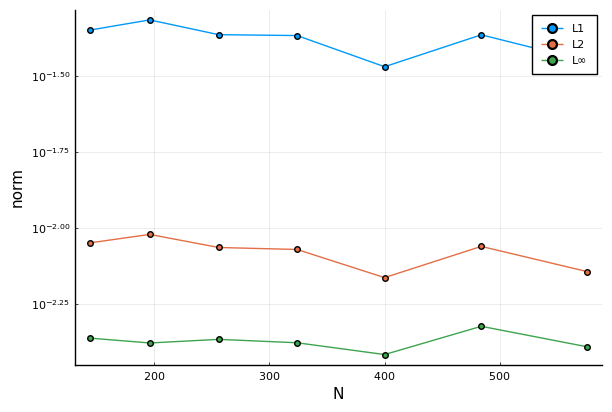

In [9]:
plot_metrics(averaged_results_scatt_cat, sample_sizes, "estimation")
savefig("figures/convergence_scatter_cat_estimation.pdf")

### Wave map (grid)

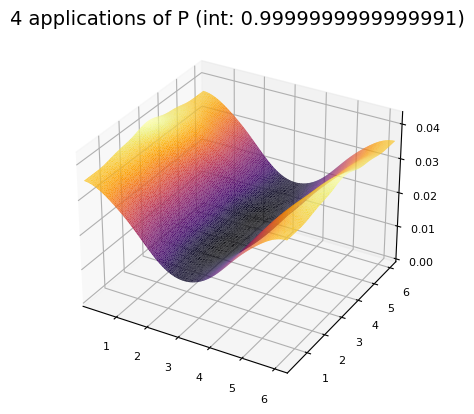

Estimating 1 / 7 ...
Estimating 2 / 7 ...
Estimating 3 / 7 ...
Estimating 4 / 7 ...
Estimating 5 / 7 ...
Estimating 6 / 7 ...
Estimating 7 / 7 ...


In [35]:
results_grid_wave = Vector{Dict}()
for s in 1:n_experiments
    println("Estimating $s / $n_experiments ...")
    sample_size = sample_sizes[s]

    output = estimate_P(grid, sample_size, range, k, integral_resolution; setup="grid", map_type="wave");
    metrics = P_diagnostics(output);
    push!(results_grid_wave, metrics)
end;

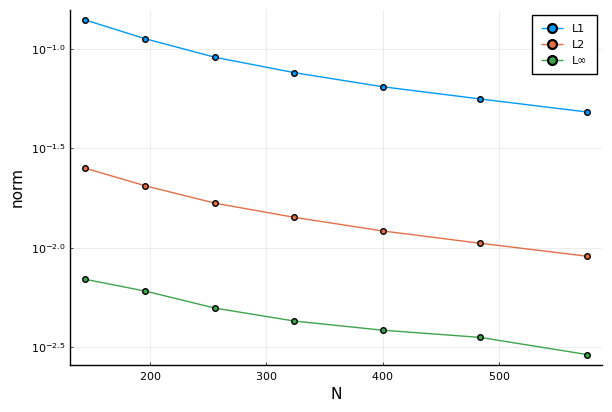

In [36]:
plot_metrics(results_grid_wave, sample_sizes, "estimation")
savefig("figures/convergence_grid_wave_estimation.pdf")

### Wave map (scattered)

In [37]:
results_scatt_wave = Vector{Vector}(undef, n_experiments)
for s in 1:n_experiments
    println("Estimating $s / $n_experiments ...")
    sample_size = sample_sizes[s]
    
    run_results = Vector{Dict}()
    for run in 1:n_runs
        println("Estimating $run / $n_runs runs ( $((s-1)*n_runs + run)  / $(n_experiments * n_runs) total)...")
        output = estimate_P(grid, sample_size, range, k, integral_resolution; setup="scattered", map_type="wave");
        metrics = P_diagnostics(output);
        push!(run_results, metrics)
    end
    
    results_scatt_wave[s] = run_results
end;

Estimating 1 / 7 ...
Estimating 1 / 10 runs ( 1  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2644 columns and 362500 nonzeros
Model fingerprint: 0x18057933
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-12, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.21s
Presolved: 2500 rows, 2644 columns, 362500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.01s

Barrier statistics:
 Dense cols : 144
 AA' NZ     : 3.600e+05
 Factor NZ  : 4.016e+05 (roughly 5 MBytes of memory)
 Factor Ops : 6.234e+07 (less than 1 second per itera

Objective value is: 1.3633117736571876
Estimating 6 / 10 runs ( 6  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2644 columns and 362500 nonzeros
Model fingerprint: 0xcad741ad
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-09, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 3e+00]
Presolve time: 0.09s
Presolved: 2500 rows, 2644 columns, 362500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.01s

Barrier statistics:
 Dense cols : 144
 AA' NZ     : 3.600e+05
 Factor NZ  : 4.016e+05 (roughly 5 MBytes of memory)
 Factor Ops : 6.234e+07 (less than 

Objective value is: 0.0034399925934849307
Estimating 10 / 10 runs ( 10  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2644 columns and 358051 nonzeros
Model fingerprint: 0xe21b2f3f
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.09s
Presolved: 2500 rows, 2644 columns, 358051 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.01s

Barrier statistics:
 Dense cols : 144
 AA' NZ     : 3.556e+05
 Fact

Objective value is: 0.9623235382496205
Estimating 4 / 10 runs ( 14  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2696 columns and 492500 nonzeros
Model fingerprint: 0x4f227452
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [9e-11, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 3e+00]
Presolve time: 0.16s
Presolved: 2500 rows, 2696 columns, 492500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.02s

Barrier statistics:
 Dense cols : 196
 AA' NZ     : 4.900e+05
 Factor NZ  : 5.405e+05 (roughly 6 MBytes of memory)
 Factor Ops : 1.113e+08 (less than

Objective value is: 0.0025417844553885516
Estimating 8 / 10 runs ( 18  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2696 columns and 492500 nonzeros
Model fingerprint: 0x09de3bb4
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [4e-09, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 3e+00]
Presolve time: 0.22s
Presolved: 2500 rows, 2696 columns, 492500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.03s

Barrier statistics:
 Dense cols : 196
 AA' NZ     : 4.900e+05
 Factor NZ  : 5.405e+05 (roughly 6 MBytes of memory)
 Factor Ops : 1.113e+08 (less t

Objective value is: 0.11401738866516098
Estimating 2 / 10 runs ( 22  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2756 columns and 633071 nonzeros
Model fingerprint: 0x0fc82e81
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.16s
Presolved: 2500 rows, 2756 columns, 633071 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.02s

Barrier statistics:
 Dense cols : 256
 AA' NZ     : 6.306e+05
 Factor 

Objective value is: 0.051297401392730535
Estimating 6 / 10 runs ( 26  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2756 columns and 613975 nonzeros
Model fingerprint: 0x033337e6
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.15s
Presolved: 2500 rows, 2756 columns, 613975 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.02s

Barrier statistics:
 Dense cols : 256
 AA' NZ     : 6.115e+05
 Factor

Objective value is: 0.10221993330014811
Estimating 10 / 10 runs ( 30  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2756 columns and 632803 nonzeros
Model fingerprint: 0xf2622bee
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.17s
Presolved: 2500 rows, 2756 columns, 632803 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.03s

Barrier statistics:
 Dense cols : 256
 AA' NZ     : 6.303e+05
 Factor

Objective value is: 0.0001163199012808036
Estimating 4 / 10 runs ( 34  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2824 columns and 630971 nonzeros
Model fingerprint: 0xed7168e4
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.17s
Presolved: 2500 rows, 2824 columns, 630971 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.02s

Barrier statistics:
 Dense cols : 324
 AA' NZ     : 6.285e+05
 Facto

Objective value is: 0.00037817487282154616
Estimating 8 / 10 runs ( 38  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2824 columns and 783716 nonzeros
Model fingerprint: 0x4da947f9
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.20s
Presolved: 2500 rows, 2824 columns, 783716 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.03s

Barrier statistics:
 Dense cols : 324
 AA' NZ     : 7.812e+05
 Fact

Objective value is: 0.031319551216256514
Estimating 2 / 10 runs ( 42  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2900 columns and 998667 nonzeros
Model fingerprint: 0x8503fb10
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.24s
Presolved: 2500 rows, 2900 columns, 998667 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.04s

Barrier statistics:
 Dense cols : 400
 AA' NZ     : 9.962e+05
 Factor

Objective value is: 0.09288618654863967
Estimating 6 / 10 runs ( 46  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2900 columns and 824768 nonzeros
Model fingerprint: 0x98b08330
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.22s
Presolved: 2500 rows, 2900 columns, 824768 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.03s

Barrier statistics:
 Dense cols : 400
 AA' NZ     : 8.223e+05
 Factor 

Objective value is: 9.507328832114581e-5
Estimating 10 / 10 runs ( 50  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2900 columns and 959415 nonzeros
Model fingerprint: 0xf3d88246
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.25s
Presolved: 2500 rows, 2900 columns, 959415 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.04s

Barrier statistics:
 Dense cols : 400
 AA' NZ     : 9.569e+05
 Facto

Objective value is: 0.01737626664066738
Estimating 4 / 10 runs ( 54  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2984 columns and 776806 nonzeros
Model fingerprint: 0x3138ab7e
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-01, 8e-01]
Presolve time: 0.19s
Presolved: 2500 rows, 2984 columns, 776806 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.04s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+06 (r

Objective value is: 0.002528332012843748
Estimating 8 / 10 runs ( 58  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2984 columns and 753094 nonzeros
Model fingerprint: 0xf90f66b9
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-01, 8e-01]
Presolve time: 0.22s
Presolved: 2500 rows, 2984 columns, 753094 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.05s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+06 (

Objective value is: 7.914848447398981e-5
Estimating 2 / 10 runs ( 62  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 3076 columns and 652323 nonzeros
Model fingerprint: 0x7fa4b1f0
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-01, 6e-01]
Presolve time: 0.17s
Presolved: 2500 rows, 3076 columns, 652323 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.04s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+06 (

Objective value is: 1.0375392776040826e-5
Estimating 6 / 10 runs ( 66  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 3076 columns and 1135175 nonzeros
Model fingerprint: 0x3ca2a4c4
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.29s
Presolved: 2500 rows, 3076 columns, 1135175 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.04s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+0

Objective value is: 0.018742227358643504
Estimating 10 / 10 runs ( 70  / 70 total)...

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 3076 columns and 843882 nonzeros
Model fingerprint: 0xc459d969
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-01, 8e-01]
Presolve time: 0.27s
Presolved: 2500 rows, 3076 columns, 843882 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.07s

Barrier statistics:
 AA' NZ     : 3.124e+06
 Factor NZ  : 3.126e+06 

In [38]:
averaged_results_scatt_wave = average_the_results(results_scatt_wave);

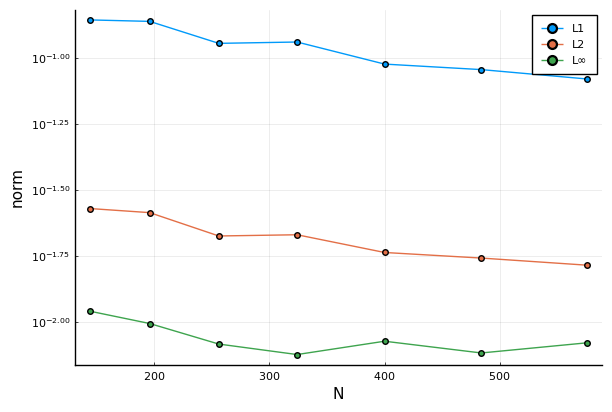

In [39]:
plot_metrics(averaged_results_scatt_wave, sample_sizes, "estimation")
savefig("figures/convergence_scatter_wave_estimation.pdf")